### 의사결정나무

In [76]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import math


df2= pd.read_csv("/Users/crlee/pandas/서울시_골목상권_스케일링.csv",encoding = 'cp949')
df2

,상권별_매출액_평균,점포_수,식료품_지출_총금액,교통_지출_총금액,시간대_아침점심_생활인구_수,시간대_오후저녁_생활인구_수,시간대_밤새벽_생활인구_수,상권별_매출건수_평균,프랜차이즈_점포_수,개업_점포_수,폐업_점포_수
0,-0.042609,-0.324363,-0.180160,-0.204429,-0.180923,-0.091914,-0.185341,0.156083,0.740132,-0.113868,-0.522115
1,-0.282165,-1.186330,-0.382371,-0.653202,-0.933633,-0.738919,-1.185251,0.487055,-0.541101,-1.115043,-1.469039
2,-0.080340,0.240921,-0.246836,-0.241533,0.522230,0.728681,0.497718,0.355192,0.593045,0.587447,0.424809
3,-0.430378,-0.324363,0.237345,0.246144,-0.029849,-0.009234,0.115979,-0.256888,-0.170471,-0.228989,0.031800
4,0.075029,0.451441,0.042486,-0.072796,0.844757,0.985235,0.756472,0.085594,0.222414,0.696803,0.729650
...,...,...,...,...,...,...,...,...,...,...,...
1082,1.854051,-1.155195,-1.121434,-1.132988,-8.133096,-7.987989,-7.412568,0.609936,-1.103786,-1.115043,-0.522115
1083,1.398018,-1.186330,-0.466656,-0.370682,-3.314819,-3.229080,-3.997228,1.071651,-2.313929,-0.672016,-0.522115
1084,1.693443,-1.788157,-0.794214,-0.643076,-1.361682,-1.558615,-1.120688,-0.099126,-1.550414,-1.115043,-1.469039
1085,-1.278567,-0.743138,-0.474913,-0.341473,0.276917,0.258693,0.110911,-0.729702,-1.103786,-0.228989,-0.522115


### 시군구 명 뺴기

In [66]:
# df1 = df.drop('상권_코드_명', axis=1)
#df2 = df1.drop('시군구_명', axis=1)
#df2

### NULL 값 처리 

In [78]:
# df2['프랜차이즈_점포_수'].isnull().sum()
# df2['식료품_지출_총금액'].isnull().sum()
# df2['의류_신발_지출_총금액'].isnull().sum()
# df2['문화_지출_총금액'].isnull().sum()
# df2['교육_지출_총금액'].isnull().sum()
# df2['유흥_지출_총금액'].isnull().sum()
# df2['평일_생활인구_수'].isnull().sum()
# df2['주말_생활인구_수'].isnull().sum()
# df2['연령대_1020_생활인구_수'].isnull().sum()
# df2['연령대_3040_생활인구_수'].isnull().sum()
# df2['연령대_5060_생활인구_수'].isnull().sum()
# df2['시간대_아침점심_생활인구_수'].isnull().sum()
# df2['시간대_오후저녁_생활인구_수'].isnull().sum()
# df2['시간대_밤새벽_생활인구_수'].isnull().sum()

In [79]:
# 레이블 데이터 세트 : 결정값 (Label)
y = df2['상권별_매출액_평균']

# 피처 데이터 세트
# 결정값으로 사용한 '상권별_매출액_평균' 제외한 나머지 모든 데이터
X = df2.drop('상권별_매출액_평균', axis=1)

# 피처 데이터 세트와 레이블 데이터 세트 완료
X

,점포_수,식료품_지출_총금액,교통_지출_총금액,시간대_아침점심_생활인구_수,시간대_오후저녁_생활인구_수,시간대_밤새벽_생활인구_수,상권별_매출건수_평균,프랜차이즈_점포_수,개업_점포_수,폐업_점포_수
0,-0.324363,-0.180160,-0.204429,-0.180923,-0.091914,-0.185341,0.156083,0.740132,-0.113868,-0.522115
1,-1.186330,-0.382371,-0.653202,-0.933633,-0.738919,-1.185251,0.487055,-0.541101,-1.115043,-1.469039
2,0.240921,-0.246836,-0.241533,0.522230,0.728681,0.497718,0.355192,0.593045,0.587447,0.424809
3,-0.324363,0.237345,0.246144,-0.029849,-0.009234,0.115979,-0.256888,-0.170471,-0.228989,0.031800
4,0.451441,0.042486,-0.072796,0.844757,0.985235,0.756472,0.085594,0.222414,0.696803,0.729650
...,...,...,...,...,...,...,...,...,...,...
1082,-1.155195,-1.121434,-1.132988,-8.133096,-7.987989,-7.412568,0.609936,-1.103786,-1.115043,-0.522115
1083,-1.186330,-0.466656,-0.370682,-3.314819,-3.229080,-3.997228,1.071651,-2.313929,-0.672016,-0.522115
1084,-1.788157,-0.794214,-0.643076,-1.361682,-1.558615,-1.120688,-0.099126,-1.550414,-1.115043,-1.469039
1085,-0.743138,-0.474913,-0.341473,0.276917,0.258693,0.110911,-0.729702,-1.103786,-0.228989,-0.522115


### 학습데이터, 테스트데이터 분류

In [80]:
# 상권별_매출액_평균 제외하고 모든 변수 원핫인코딩 적용 
# target = df2['상권별_매출액_평균']

# df = df2.drop(columns = '상권별_매출액_평균')
# df = pd.get_dummies(df2)

# df2['상권별_매출액_평균'] = target # df에 다시 target 컬럼 추가
# df2.info()

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.3,
                                    
                                    random_state = 1234) #난수고정

In [90]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.1 MB/s eta 0:00:00


### 모델 학습/예측/평가

DecisionTreeRegressor(max_depth=10, min_samples_leaf=35, random_state=1)

train set Tree 0.6060299123158881
test set Tree 0.5620595876175711


<Figure size 2000x2000 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

[Text(0.41935483870967744, 0.9285714285714286, '상권별_매출건수_평균 <= -0.185\nsquared_error = 0.918\nsamples = 869\nvalue = 0.002'),
 Text(0.0967741935483871, 0.7857142857142857, '상권별_매출건수_평균 <= -1.722\nsquared_error = 0.766\nsamples = 277\nvalue = -0.864'),
 Text(0.06451612903225806, 0.6428571428571429, 'squared_error = 1.057\nsamples = 44\nvalue = -1.67'),
 Text(0.12903225806451613, 0.6428571428571429, '점포_수 <= -0.799\nsquared_error = 0.565\nsamples = 233\nvalue = -0.712'),
 Text(0.06451612903225806, 0.5, '시간대_아침점심_생활인구_수 <= -0.601\nsquared_error = 0.66\nsamples = 99\nvalue = -0.98'),
 Text(0.03225806451612903, 0.35714285714285715, 'squared_error = 0.863\nsamples = 51\nvalue = -0.763'),
 Text(0.0967741935483871, 0.35714285714285715, 'squared_error = 0.342\nsamples = 48\nvalue = -1.21'),
 Text(0.1935483870967742, 0.5, '상권별_매출건수_평균 <= -0.731\nsquared_error = 0.403\nsamples = 134\nvalue = -0.514'),
 Text(0.16129032258064516, 0.35714285714285715, 'squared_error = 0.425\nsamples = 42\nvalue = -0

<Figure size 2000x2000 with 0 Axes>

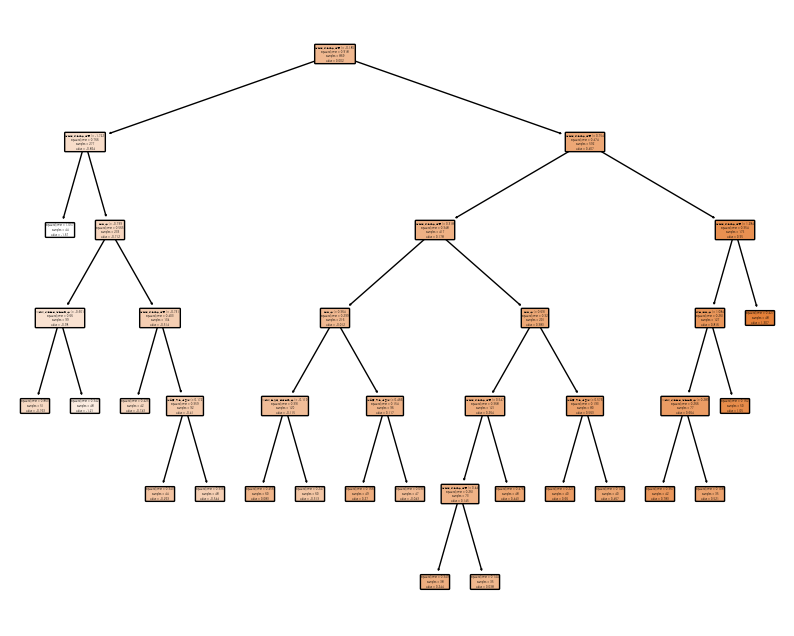

MSE: 0.3975967213946757
RMSE: 0.6305527110358623
R^2: 0.5620595876175711


In [95]:
# 종속변수가 수치형이므로 회귀트리로 해야함 DecisionTreeRegressor()
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import graphviz # 노드 확대

# 결정 트리 모형 만들기 
# min_samples_split: 분할되기 위해 노드가 가져야 최소 샘플 수
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# min_weight_fraction_leaf: 가중치가 부여된 전체 샘플 수에서의 비율
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 각 노드에서 분할에 사용할 특성의 최대 수

model = DecisionTreeRegressor(random_state=1, min_samples_leaf=35, max_depth=10)

# 모델 학습
model.fit(X_train, y_train)

# 모델 평가
print("train set Tree", model.score(X_train, y_train, sample_weight=None))
print("test set Tree", model.score(X_test, y_test, sample_weight=None))

# print(export_text(model))

plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 16
plt.rcParams["axes.unicode_minus"] = False
plt.figure()

plt.figure(figsize=(10,8))
plot_tree(model,impurity=True, filled = True, rounded=True, feature_names = X.columns )
#plot_tree(model,filled = True,feature_names = X.feature_names)
plt.show()

# 모형 예측 및 평가
# max_depth의 옵션을 변동하면, RMSE와 𝑅^2 점수가 변동됨 
 
# 예측 값 y_preds 실제 값 y_test
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2_points = r2_score(y_test, y_preds)


#MSE 값이 작을수록 모델의 예측이 실제 값과 가깝다는 것을 의미
print("MSE:", mse)
# RMSE 실제값과 예측값의 차이 : 값이 작을수록 좋음 
print("RMSE:", rmse)
# R^2 회귀 모델의 설명력을 평가하는 지표 1에 가까울수록 좋음
print("R^2:", r2_points)



In [84]:
from sklearn.model_selection import GridSearchCV

# 튜닝할 하이퍼파라미터 그리드 생성
param_grid = {
    'max_depth': [3, 10, 13,5],  # 트리의 최대 깊이 후보 값
    'min_samples_leaf': [12, 11, 13, 7]  # 잎 노드에 필요한 최소 샘플 수 후보 값
}

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

# 최적의 하이퍼파라미터 조합 확인
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 최적의 모델 생성 및 학습
best_model = DecisionTreeRegressor(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'])
best_model.fit(X, y)

# 예측 수행
y_pred = best_model.predict(X)

# 평가 지표 계산
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
#MSE 값이 작을수록 모델의 예측이 실제 값과 가깝다는 것을 의미
print("MSE:", mse)
# RMSE 실제값과 예측값의 차이 : 값이 작을수록 좋음 
print("RMSE:", rmse)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=10, min_samples_leaf=35,
                                             random_state=1),
             param_grid={'max_depth': [3, 10, 13, 5],
                         'min_samples_leaf': [12, 11, 13, 7]},
             scoring='neg_mean_squared_error')

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 11}


DecisionTreeRegressor(max_depth=5, min_samples_leaf=11)

MSE: 0.3624320518983413
RMSE: 0.6020232984680421


### XGBoost

In [85]:
import xgboost
import xgboost as xgb
import math

In [86]:
# Data split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# XGBoost model creation
xgb_model = xgb.XGBRegressor(random_state=0, max_depth=5, min_child_weight=8, colsample_bytree=0.8, learning_rate=0.1, n_estimators=200)

# Model training
xgb_model.fit(X_train, y_train)

# Train RMSE
train_predict = xgb_model.predict(X_train)
train_rmse = math.sqrt(mean_squared_error(train_predict, y_train))
print("XGBoost Train RMSE: {}".format(train_rmse))

# Train MSE
train_predict = xgb_model.predict(X_train)
train_mse = mean_squared_error(train_predict, y_train)
print("XGBoost Train MSE: {}".format(train_mse))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

XGBoost Train RMSE: 0.21318612172639176
XGBoost Train MSE: 0.045448322496739926


### lightGBM 

In [87]:
import lightgbm
print(lightgbm.__version__)

3.3.5


In [88]:
import lightgbm
import pandas as pd
import numpy as np
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import math

# LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 200
}

# Training the LightGBM model
lgb_model = lgb.train(params, train_data)

# Predicting on the training set
train_predict = lgb_model.predict(X_train)
train_rmse = math.sqrt(mean_squared_error(train_predict, y_train))
print("LightGBM Train RMSE: {}".format(train_rmse))

# Predicting on the training set
train_predict = lgb_model.predict(X_train)
train_mse = mean_squared_error(train_predict, y_train)
print("LightGBM Train MSE: {}".format(train_mse))

/Users/crlee/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1877
[LightGBM] [Info] Number of data points in the train set: 869, number of used features: 10
[LightGBM] [Info] Start training from score 0.001521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

LightGBM Train MSE: 0.10507553104354551


점포_수               0.019804
식료품_지출_총금액         0.009541
교통_지출_총금액          0.000000
시간대_아침점심_생활인구_수    0.000000
시간대_오후저녁_생활인구_수    0.000000
시간대_밤새벽_생활인구_수     0.014523
상권별_매출건수_평균        0.938183
프랜차이즈_점포_수         0.000000
개업_점포_수            0.001499
폐업_점포_수            0.016451
dtype: float64

<Axes: >

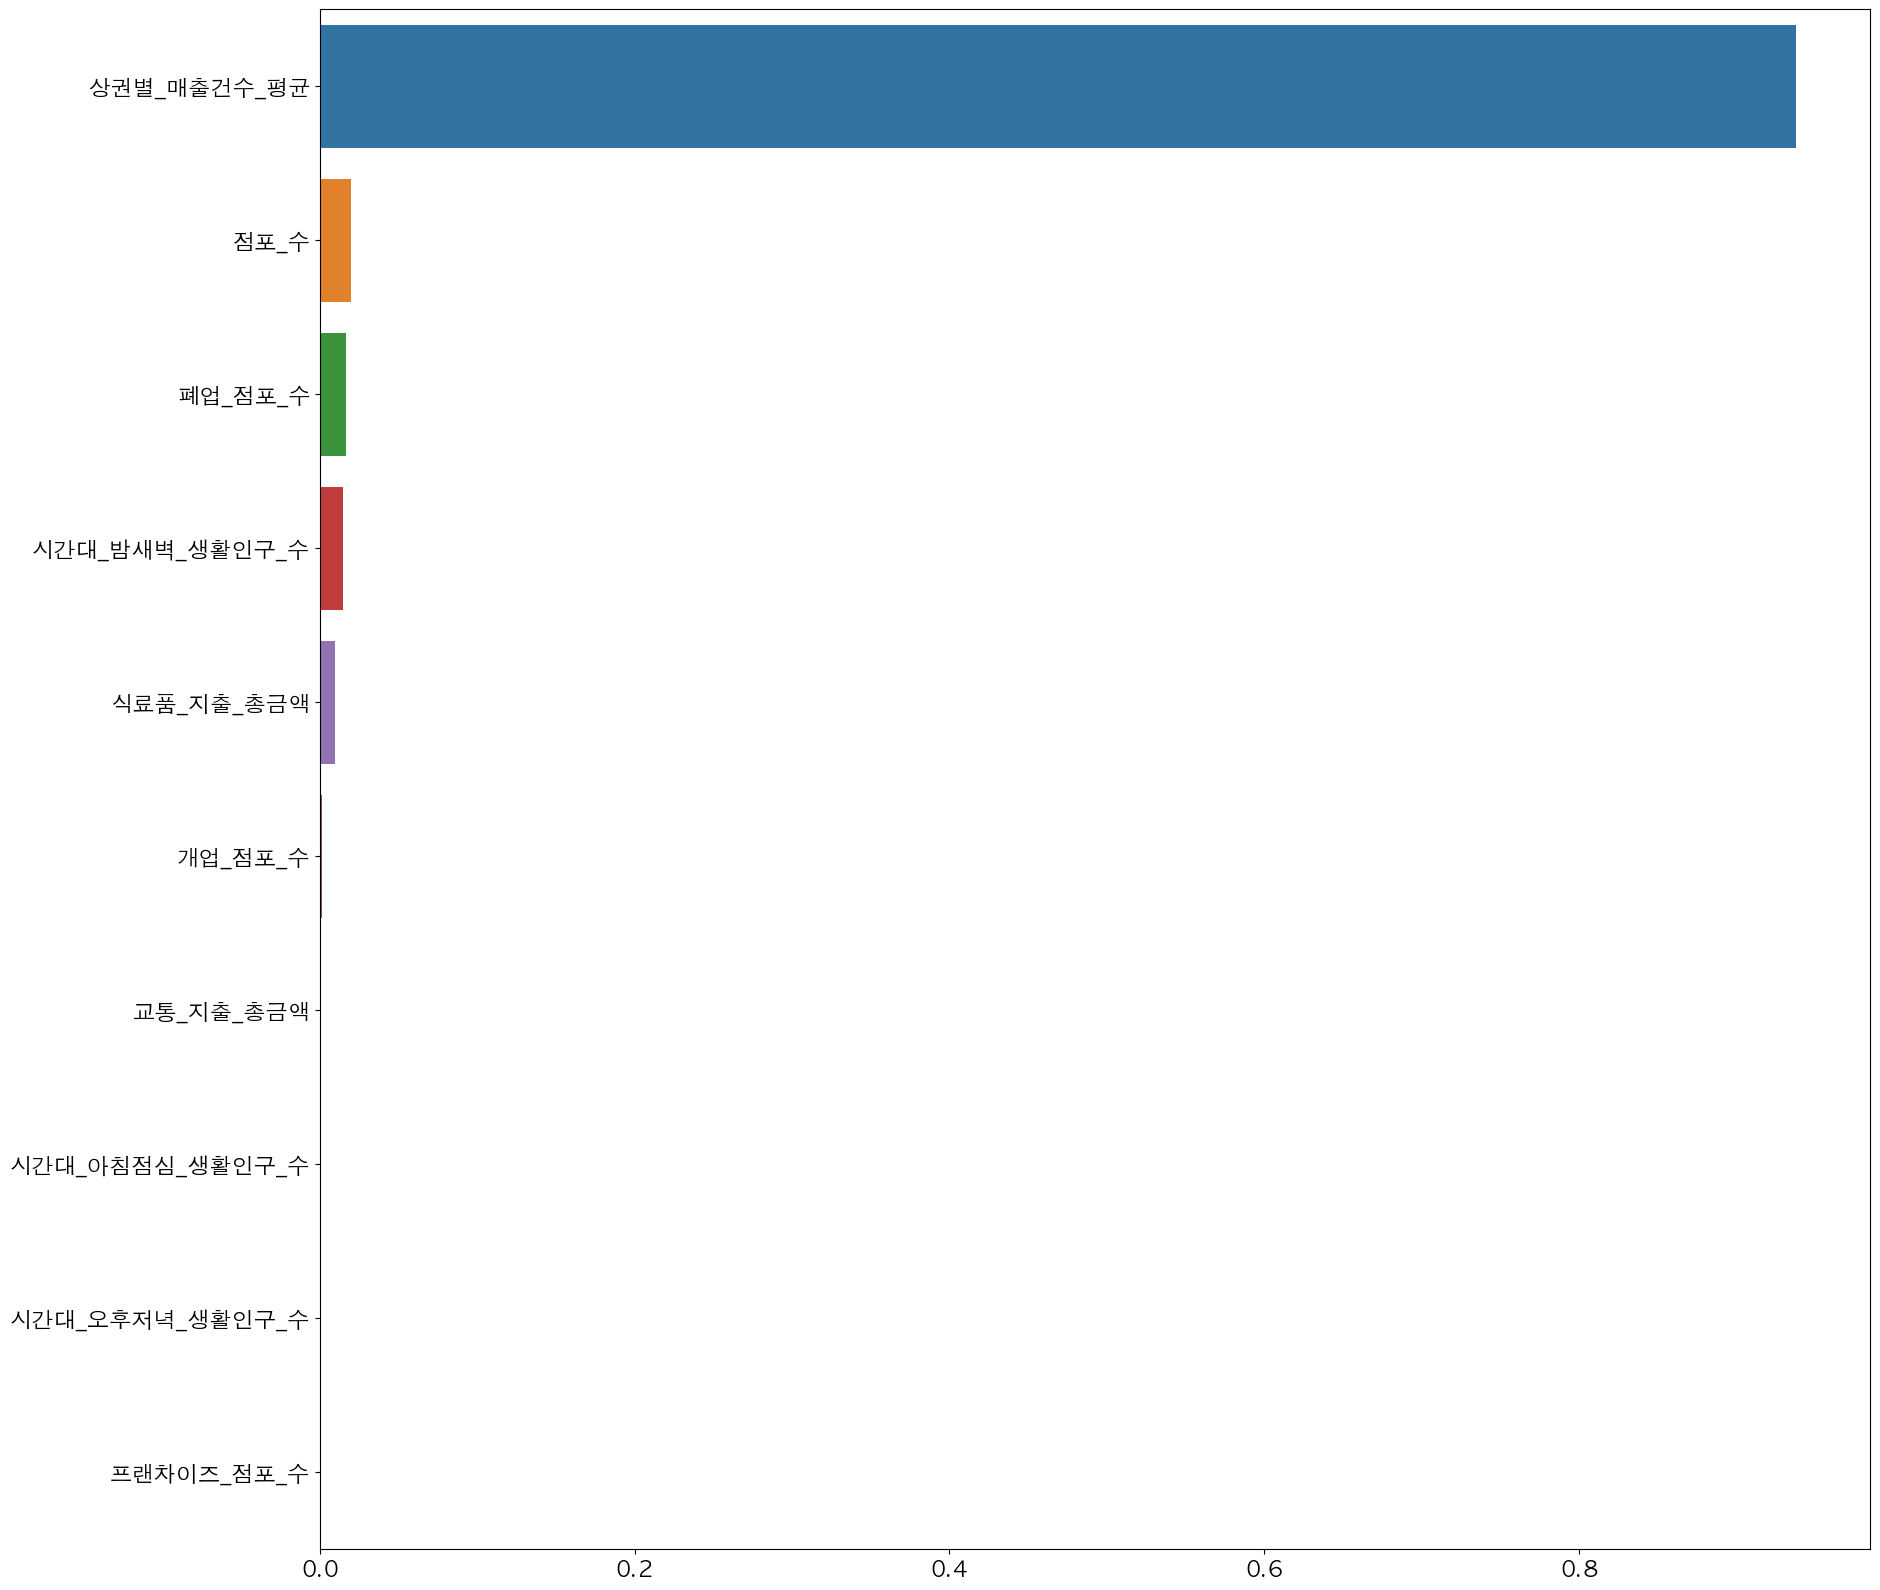

In [89]:
# feature_importances_ 메소드로 피처 중요도 확인
feature_series = pd.Series(data= model.feature_importances_, index=X.columns )
feature_series

feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)